In [110]:
import matplotlib.pyplot as plt

In [ ]:
import os
import pathlib
import re
import zipfile
from io import BytesIO
from glob import glob
import requests

import earthaccess
import earthpy as et
import numpy as np
import pandas as pd
import geopandas as gpd
import holoviews as hv
import hvplot.pandas
import hvplot.xarray
import matplotlib.pyplot as plt

import rioxarray as rxr  #work with raster data
from rioxarray.merge import merge_arrays # Merge rasters
from xrspatial import zonal_stats # calc stats by zone
import warnings

c:\Users\chrmq\miniconda3\envs\earth-analytics-python\Lib\site-packages\dask\dataframe\__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [13]:
 import earthaccess

Larch

Here is a map of the range of the Western larch in the northwestern United States (Montana, Idaho, Oregon, and Washington) and southwestern Canada (British Columbia). 

<a title="Elbert L. Little, Jr., of the U.S. Department of Agriculture, Forest Service, Public domain, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Larix_occidentalis_range_map_4.png"><img width="512" alt="Larix occidentalis range map in the northwestern United States and southwestern Canada" src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/09/Larix_occidentalis_range_map_4.png/512px-Larix_occidentalis_range_map_4.png?20140105205740"></a>

Map credit: Elbert L. Little, Jr., of the U.S. Department of Agriculture, Forest Service, Public domain, via Wikimedia Commons

some more markdown

In [107]:
# Define and create the project data directory
data_dir = os.path.join(
    pathlib.Path.home(),
    'earth-analytics',
    'data',
    'habitat_final'
)
os.makedirs(data_dir, exist_ok=True)

# Define info for USFS NF shapefile download
nfs_url = ("https://data.fs.usda.gov/geodata/edw/"
               "edw_resources/shp/S_USA.AdministrativeForest.zip")

nfs_dir = os.path.join(data_dir, 'usfs_national_forests')
os.makedirs(nfs_dir, exist_ok=True)
nfs_shp_path = os.path.join(nfs_dir, 'S_USA.AdministrativeForest.shp')

# Only download once
if not os.path.exists(nfs_shp_path):
    nfs_gdf = gpd.read_file(nfs_url)
    nfs_gdf.to_file(nfs_shp_path)

# Unzip spatial data
#with zipfile.ZipFile(S_USA.AdministrativeForest.zip) as download_zip:
#    download_zip.extractall(path=nfs_dir)



In [37]:
nfs_gdf.head()
# Subset to Willamette and Umatilla NFs
#nfs2_gdf = nfs_gdf[nfs_gdf['FORESTNAME'].isin(['Willamette National Forest', 'Umatilla National Forest'])]
nfs2_gdf = nfs_gdf[nfs_gdf['FORESTNAME'].isin(['Umatilla National Forest', 'Payette National Forest'])]

# Check the data
nfs2_gdf

,ADMINFORES,REGION,FORESTNUMB,FORESTORGC,FORESTNAME,GIS_ACRES,SHAPE_AREA,SHAPE_LEN,geometry
58,99041200010343,04,12,0412,Payette National Forest,2407296.569,1.113418,11.686712,"MULTIPOLYGON (((-115.21399 45.56972, -115.2137..."
92,99061400010343,06,14,0614,Umatilla National Forest,1498094.353,0.697580,15.051197,"MULTIPOLYGON (((-118.00972 45.61629, -118.0097..."


In [ ]:
#will_gdf = nfs_gdf[nfs_gdf['FORESTNAME'] == 'Willamette National Forest']
uma_gdf = nfs_gdf[nfs_gdf['FORESTNAME'] == 'Umatilla National Forest']
pay_gdf = nfs_gdf[nfs_gdf['FORESTNAME'] == 'Payette National Forest']

In [ ]:
# POLARIS soil data
soil_dir = os.path.join(data_dir, 'polaris')
os.makedirs(soil_dir, exist_ok=True)
polaris_shp_path = os.path.join(soil_dir, ' .shp')

In [ ]:
earthaccess.login(strategy="interactive", persist=True)
srtm_search = earthaccess.search_datasets(keyword='SRTM DEM')
#srtm_search

In [ ]:
# Shuttle Radar Topography Mission (SRTM) elevation model data
srtm_dir = os.path.join(data_dir, 'srtm')
os.makedirs(srtm_dir, exist_ok=True)
polaris_shp_path = os.path.join(srtm_dir, ' .shp')

In [38]:
pay_results = earthaccess.search_data(
    short_name="SRTMGL1",
    bounding_box=tuple(pay_gdf.total_bounds),
)
pay_results

[Collection: {'ShortName': 'SRTMGL1', 'Version': '003'}
 Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'BoundingRectangles': [{'WestBoundingCoordinate': -117.00027778, 'EastBoundingCoordinate': -115.99972222, 'NorthBoundingCoordinate': 46.00027778, 'SouthBoundingCoordinate': 44.99972222}]}}}
 Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2000-02-11T00:00:00.000Z', 'EndingDateTime': '2000-02-21T23:59:59.000Z'}}
 Size(MB): 15.2257
 Data: ['https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/SRTMGL1.003/N45W117.SRTMGL1.hgt/N45W117.SRTMGL1.hgt.zip'],
 Collection: {'ShortName': 'SRTMGL1', 'Version': '003'}
 Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'BoundingRectangles': [{'WestBoundingCoordinate': -117.00027778, 'EastBoundingCoordinate': -115.99972222, 'NorthBoundingCoordinate': 45.00027778, 'SouthBoundingCoordinate': 43.99972222}]}}}
 Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2000-02-11T00:00:00.000Z', 'EndingDateTim

In [106]:
#will_results = earthaccess.search_data(
#    short_name="SRTMGL1",
#    bounding_box=tuple(will_gdf.total_bounds),
#)
#will_results
# 4 

In [ ]:
uma_results = earthaccess.search_data(
    short_name="SRTMGL1",
    bounding_box=tuple(uma_gdf.total_bounds),
)
uma_results
#6 

[Collection: {'ShortName': 'SRTMGL1', 'Version': '003'}
 Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'BoundingRectangles': [{'WestBoundingCoordinate': -120.00027778, 'EastBoundingCoordinate': -118.99972222, 'NorthBoundingCoordinate': 45.00027778, 'SouthBoundingCoordinate': 43.99972222}]}}}
 Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2000-02-11T00:00:00.000Z', 'EndingDateTime': '2000-02-21T23:59:59.000Z'}}
 Size(MB): 12.1273
 Data: ['https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/SRTMGL1.003/N44W120.SRTMGL1.hgt/N44W120.SRTMGL1.hgt.zip'],
 Collection: {'ShortName': 'SRTMGL1', 'Version': '003'}
 Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'BoundingRectangles': [{'WestBoundingCoordinate': -118.00027778, 'EastBoundingCoordinate': -116.99972222, 'NorthBoundingCoordinate': 45.00027778, 'SouthBoundingCoordinate': 43.99972222}]}}}
 Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2000-02-11T00:00:00.000Z', 'EndingDateTim

In [ ]:
# Define a search for the SRTM results
srtm_path = os.path.join(srtm_dir, '*.hgt.zip')

# Download the search results if not already done
if not glob(srtm_path):
    for result in srtm_results:
        earthaccess.download(result, srtm_dir)


In [ ]:
# Define a pattern for the unzipped tile images
srtm_pattern = os.path.join(srtm_dir, '*.hgt')

# Now unzip all the dlownload files 
if not glob(srtm_pattern):
    for srtm_path in glob(srtm_pattern):
        #print(srtm_path)
        with zipfile.ZipFile(srtm_path) as download_zip:
            download_zip.extractall(path=srtm_dir)

C:\Users\chrmq\earth-analytics\data\habitat_final\srtm\N44W115.SRTMGL1.hgt.zip
C:\Users\chrmq\earth-analytics\data\habitat_final\srtm\N44W116.SRTMGL1.hgt.zip
C:\Users\chrmq\earth-analytics\data\habitat_final\srtm\N44W117.SRTMGL1.hgt.zip
C:\Users\chrmq\earth-analytics\data\habitat_final\srtm\N44W118.SRTMGL1.hgt.zip
C:\Users\chrmq\earth-analytics\data\habitat_final\srtm\N44W119.SRTMGL1.hgt.zip
C:\Users\chrmq\earth-analytics\data\habitat_final\srtm\N44W120.SRTMGL1.hgt.zip
C:\Users\chrmq\earth-analytics\data\habitat_final\srtm\N45W115.SRTMGL1.hgt.zip
C:\Users\chrmq\earth-analytics\data\habitat_final\srtm\N45W116.SRTMGL1.hgt.zip
C:\Users\chrmq\earth-analytics\data\habitat_final\srtm\N45W117.SRTMGL1.hgt.zip
C:\Users\chrmq\earth-analytics\data\habitat_final\srtm\N45W118.SRTMGL1.hgt.zip
C:\Users\chrmq\earth-analytics\data\habitat_final\srtm\N45W119.SRTMGL1.hgt.zip
C:\Users\chrmq\earth-analytics\data\habitat_final\srtm\N45W120.SRTMGL1.hgt.zip
C:\Users\chrmq\earth-analytics\data\habitat_final\sr

In [ ]:
nfs2_bounds = 

<Axes: title={'center': 'band = 1, spatial_ref = 0'}, xlabel='x', ylabel='y'>

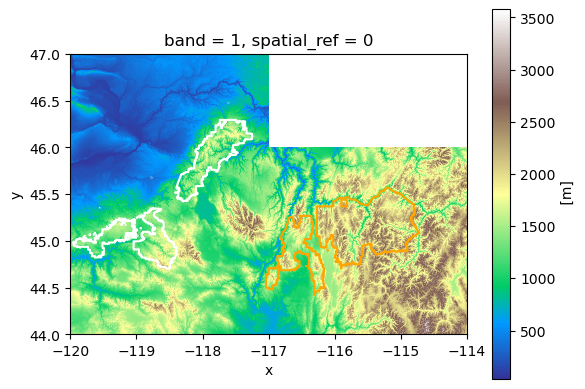

In [111]:
# Open each unzipped raster tile, put it into a list
# Then merge the tiles using rioxarray.merge
srtm_da_list = []

for file in glob(srtm_pattern):
    tile_da = rxr.open_rasterio(file, mask_and_scale=True).squeeze()
    bounds = (nfs2_gdf.to_crs(tile_da.rio.crs).total_bounds)
    cropped_tile = tile_da.rio.clip_box(*bounds)
    srtm_da_list.append(tile_da)
    srtm_das = merge_arrays(srtm_da_list)

# Plot the merged tiles
srtm_das.plot(cmap='terrain')
uma_gdf.boundary.plot(ax=plt.gca(), color='white')
pay_gdf.boundary.plot(ax=plt.gca(), color='orange')

In [113]:
import xrspatial

In [115]:
# calculate slope
slope_da = xrspatial.slope(srtm_das)

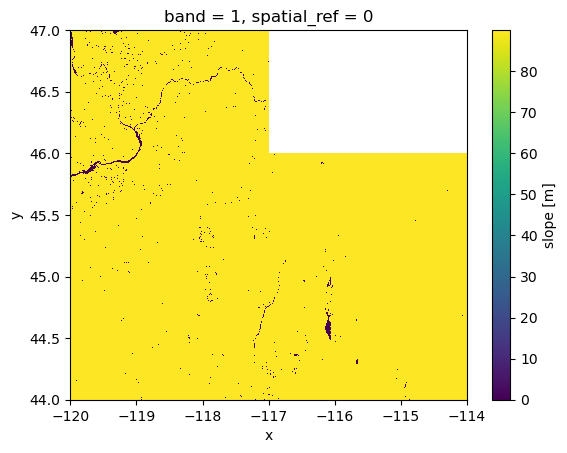

In [116]:
slope_da.plot()


Willamette National Forest

https://www.srs.fs.usda.gov/pubs/misc/ag_654/volume_1/larix/occidentalis.htm
"Western larch grows in a relatively moist-cool climatic zone, with low temperature limiting its upper elevational range and deficient moistures its lower extremes (44). Mean annual temperature within the larch zone is about 7° C (45° F), but annual maximums average 29° C (84° F) and minimums average -9° C (15° F) (table 1) (35). Average temperatures during the May through August growing season are about 16° C (60° F) with July the warmest month. The frost-free season varies from about 60 to 160 days, usually from early June through early September. Frosts can occur any month of the year."

"Soils and Topography
Western larch grows on a wide variety of soils. The most extensive soils have developed in glacial till or colluvium composed of materials derived from limestone, argillite, and quartzite bedrocks of the Precambrian belt geologic series. Larch also grows on soils developed in Recent and Tertiary alluvium and Pleistocene lake sediments. Most soils suitable for the growth of western larch are deep and well drained. Soils developed in glacial till, colluvium, and recent alluvium have nongravelly to gravelly loamy surfaces and gravelly to extremely gravelly loamy subsoils. Volcanic ash is often incorporated into the surface horizon. Soils developed in Tertiary sediments or Pleistocene lake sediments have silt loam surfaces and silt loam, silty clay loam, silty clay, or clay subsoils.

Most soils supporting the growth of western larch are classified in two orders of the soil taxonomy: Inceptisols and Alfisols. Occasionally western larch is found on soils of the order Spodosols, but Spodosols are not extensive within the range of western larch and generally occur above the upper elevational limits of the species. A majority of the soils supporting the growth of western larch are the Cryoboralf, Cryochrept, and Cryandept great groups. Mean annual soil temperature of the soils within the great groups is about 5° C (41° F) at 51 cm (20 in). At low elevations on southern or western exposures within the range of western larch, soil temperatures are warmer and soils supporting the growth of western larch are in the Eutroboralf and Eutrochrept great soil groups.

Western larch grows best on the more moist Eutrochrepts or Eutroboralfs and the lower elevation (warmer) Cryochrepts and Cryoboralfs. It is commonly found growing on valley bottoms, benches, and north- and east-facing mountain slopes. South and west exposures are often too severe for larch seedling establishment, particularly on the drier sites found at larch's lower elevational limits and the southern portion of its range. On moist sites found in the mid-to northern-portion of its range and on mid- to high-elevation sites, larch grows on all exposures."

https://how-to-grow.org/vr/western/t/larch-tree
"So, what are the optimal growing conditions for western larch trees? Let's start with their preferred climate. Western larches thrive in cool, moist climates with mild winters and warm summers. They can tolerate a wide range of temperatures, from -40°F to 100°F, but they prefer temperatures between 60°F and 80°F during the growing season.

In terms of soil, western larches prefer well-drained soils that are slightly acidic (pH between 5.0 and 6.5). They can tolerate a range of soil types, from sandy loam to clay loam, but they do not do well in heavy clay soils or soils that are constantly wet.
Water is also important for the growth and health of western larch trees. They require consistent moisture during the growing season (spring through fall), but they do not like to sit in waterlogged soil. A good rule of thumb is to water deeply once or twice a week during dry spells, making sure the water penetrates at least 12 inches into the soil."


In [ ]:
polaris_url =